In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
src = cv2.imread('images/os_src.jpg', 0)
template = cv2.imread('images/os_template.jpg', 0)
w, h = template.shape[::-1]

### Template Matching para uma imagem

In [3]:
res = cv2.matchTemplate(src, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
print(max_loc)
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(src,top_left, bottom_right, 0, 2)
    
cv2.imshow('SRC', src)
cv2.imwrite('output/original_marked.png', src)
cv2.imshow('Result', res)
cv2.normalize(res, res, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite('output/matching.png', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

(168, 93)


### Template Matching usando a pirâmide Gaussiana no template 

(168, 93)
(187, 108)
(183, 346)
(50, 319)


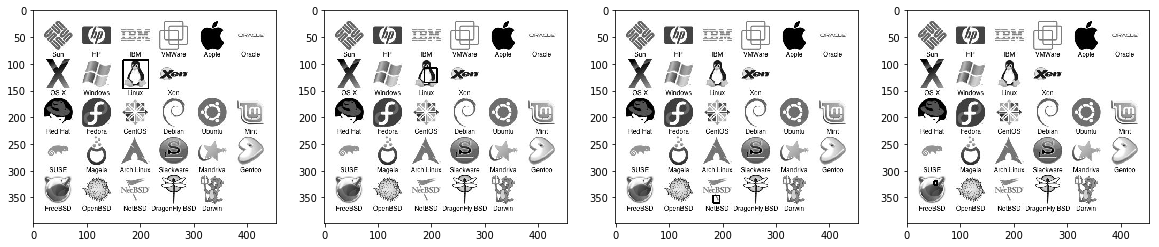

In [24]:
src = cv2.imread('images/os_src.jpg', 0)
template = cv2.imread('images/os_template.jpg', 0)

n_levels = 4
gaussians = [template.copy()]
results = []

for i in range(n_levels - 1):
    gaussians.append(cv2.pyrDown(gaussians[i]))
    
for i in range(n_levels):
    out = src.copy()
    w, h = gaussians[i].shape[::-1]
    res = cv2.matchTemplate(src, gaussians[i], cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = max_loc
    print(max_loc)
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(out, top_left, bottom_right, 0, 2)
    results.append(out.copy())
    
fig = plt.figure(figsize=(20, 5))

for i in range(n_levels):
    plt.subplot(1, n_levels, i+1)
    plt.imshow(results[i], cmap='gray')

plt.savefig('output/gaussian_pyr_tm.png', bbox_inches='tight')